In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
import json
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
from gensim.models import Word2Vec

import nltk
nltk.download("punkt")
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import tokenizer_from_json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


In [5]:
from transformers import BertTokenizer, BertModel
import re
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [8]:
# load the data and responses from intents.json
with open("/content/intents.json", "r") as f:
    intents_data = json.load(f)


In [9]:
patterns = []
responses = []
tags = []

In [82]:
patterns[:1],responses[:1]

(['What is linear regression?'],
 ['Linear regression is a statistical method used to model the relationship between two variables.'])

In [10]:
# Iterate over intents in the data
for intent in intents_data['intents']:
    # Iterate over patterns in each intent
    for i, pattern in enumerate(intent['patterns']):
        # Append pattern to patterns list
        patterns.append(pattern)
        # Append response corresponding to the current pattern
        responses.append(intent['responses'][i])
        # Append tag to tags list
        tags.append(intent['tag'])

In [11]:
# Print the first few elements of each list for verification
print("Tags:", tags[0])
print("Patterns:", patterns[0])
print("Responses:", responses[0])
print(f"length of tags is {len(tags)}")
print(f"length of Patterns is {len(patterns)}")
print(f"length of Responses is {len(responses)}")

Tags: linear regression
Patterns: What is linear regression?
Responses: Linear regression is a statistical method used to model the relationship between two variables.
length of tags is 552
length of Patterns is 552
length of Responses is 552


## Data Visualization

## Data Visualization - Word CLoud

In [13]:
# Join all patterns and responses into single strings
all_patterns_text = ' '.join(patterns)
all_responses_text = ' '.join(responses)


In [14]:
# Generate word clouds for patterns
pattern_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_patterns_text)

# Generate word clouds for responses
response_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_responses_text)

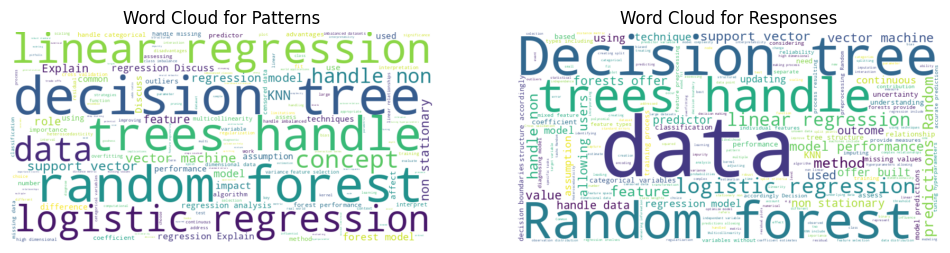

In [15]:
# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pattern_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Patterns')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(response_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Responses')
plt.axis('off')

plt.show()

## Data Visualization - Frequency Count

In [18]:
# Tokenize the patterns and responses
pattern_tokens = [token for pattern in patterns for token in pattern.split()]
response_tokens = [token for response in responses for token in response.split()]

In [19]:
# Calculate word frequency
pattern_word_freq = Counter(pattern_tokens)
response_word_freq = Counter(response_tokens)

In [25]:
# Get top 50 most frequent words for patterns and responses
top_pattern_words = pattern_word_freq.most_common(70)
top_response_words = response_word_freq.most_common(70)

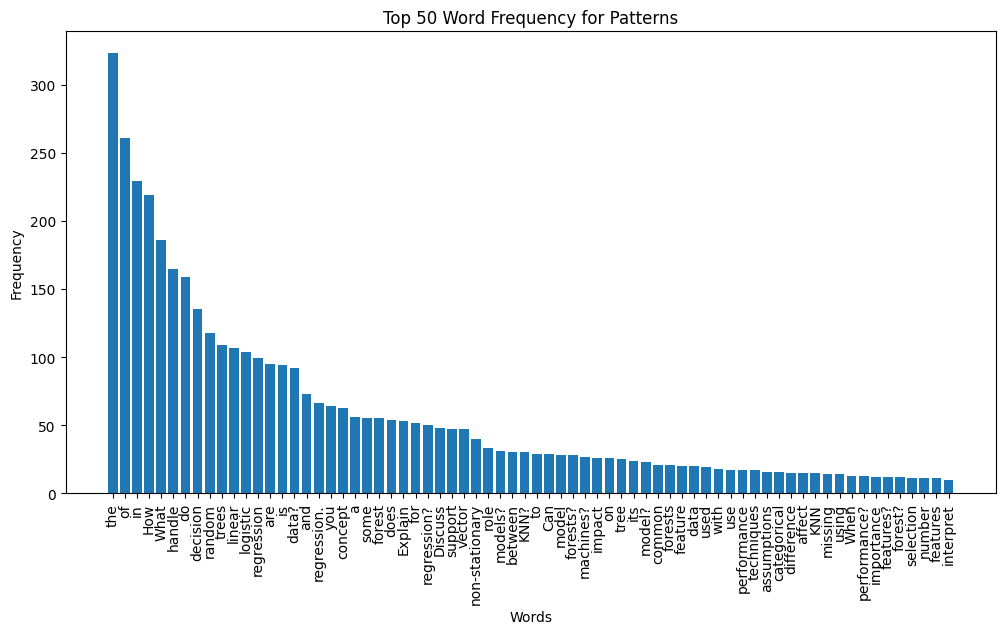

In [26]:
# Plot word frequency for patterns
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_pattern_words], [count[1] for count in top_pattern_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Word Frequency for Patterns')
plt.xticks(rotation=90)
plt.show()

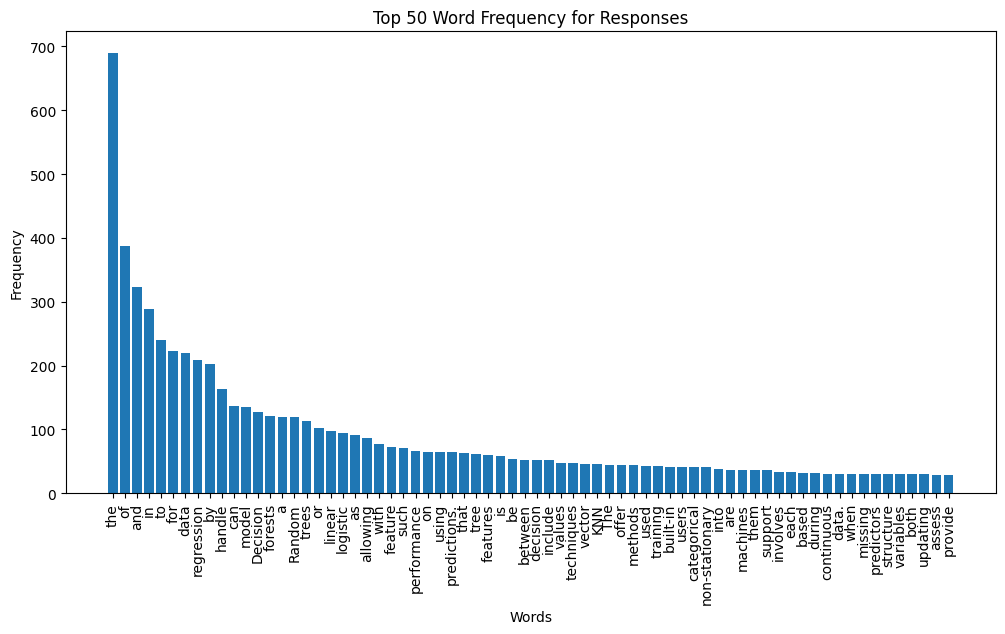

In [27]:
# Plot word frequency for responses
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_response_words], [count[1] for count in top_response_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Word Frequency for Responses')
plt.xticks(rotation=90)
plt.show()

## Data Visualization - Topic Modeling Analysis for Patterns:


In [83]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [98]:
def topic_modeling_analysis(text_series, num_topics=10):
    """
    Perform topic modeling analysis using Latent Dirichlet Allocation (LDA) on the text data.

    Parameters:
    - text_series: List of text data
    - num_topics: Number of topics to identify (default is 15)
    """
    # Convert text data to document-term matrix
    vectorizer = CountVectorizer()
    dtm = vectorizer.fit_transform(text_series)

    # Perform LDA
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(dtm)

    # Get list of feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Visualize topics
    plt.figure(figsize=(10, 6))
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[:-11:-1]  # Top 10 words for each topic
        top_words = [feature_names[i] for i in top_words_idx]
        plt.barh(range(len(top_words)), topic[top_words_idx], align='center', alpha=0.7, label=f'Topic {topic_idx}')
        plt.yticks(range(len(top_words)), top_words)
    plt.xlabel('Word Importance')
    plt.ylabel('Word')
    plt.title('Top Words in Each Topic (Patterns)')
    plt.legend()
    plt.show()

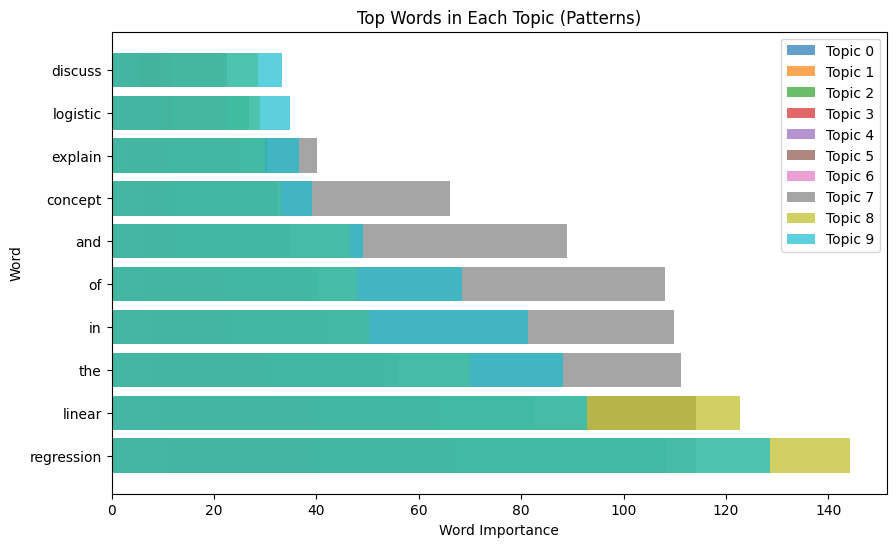

In [99]:
# Call the function with patterns data
topic_modeling_analysis(patterns)

## Call the function with responses data


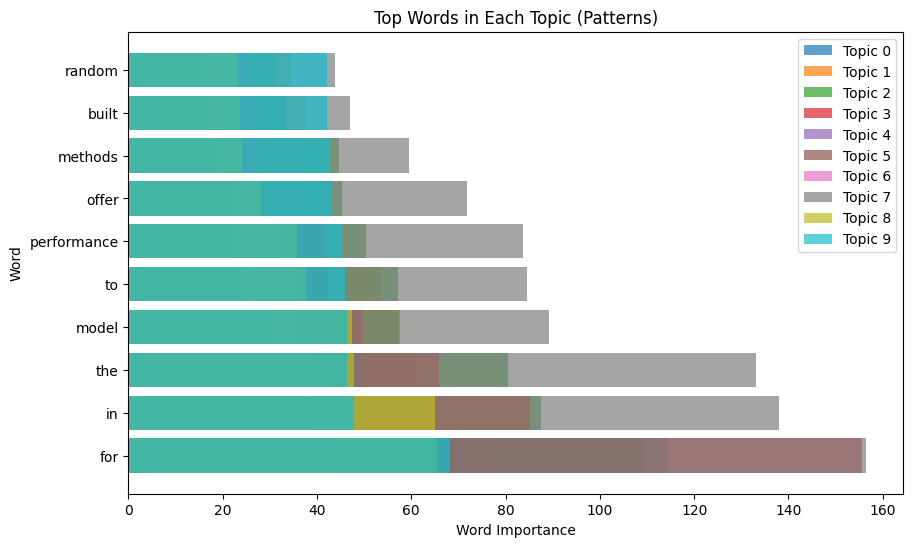

In [100]:
topic_modeling_analysis(responses)

In [69]:
from transformers import BertTokenizer,BertModel
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [67]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from transformers import BertTokenizer,BertModel
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [105]:
# Define preprocessing function
def preprocess_sentence(sentence):
    # Remove punctuation and special characters
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Optionally remove stopwords and perform lemmatization
    stop_words = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(sentence)
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]

    return ' '.join(tokens)

In [106]:
def mean_pooling(token_embeddings, attention_mask):
    # Mask padding tokens
    mask = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    masked_embeddings = token_embeddings * mask
    # Sum embeddings across tokens
    summed = torch.sum(masked_embeddings, 1)
    # Calculate mean embeddings
    summed_mask = torch.clamp(mask.sum(1), min=1e-9)
    mean_pooled = summed / summed_mask
    return mean_pooled

In [107]:
def generate_bert_embeddings(texts):
    bert_embeddings = []
    for text in texts:
        # Preprocess the text
        preprocessed_text = preprocess_sentence(text)

        # Tokenize the preprocessed text
        inputs = tokenizer(preprocessed_text, return_tensors='pt', padding=True, truncation=True)

        # Pass the tokenized input to the BERT model
        with torch.no_grad():
            outputs = model(**inputs)

        # Perform mean pooling over the token embeddings
        mean_pooled_embedding = mean_pooling(outputs.last_hidden_state, inputs['attention_mask'])

        # Append the mean pooled embedding to the list
        bert_embeddings.append(mean_pooled_embedding)

    # Convert list of tensors to a single tensor
    bert_embeddings_tensor = torch.cat(bert_embeddings, dim=0)
    return bert_embeddings_tensor

In [108]:
# Generate BERT embeddings for patterns
bert_embeddings_patterns = generate_bert_embeddings(patterns)

In [109]:
len(responses), responses[0]

(552,
 'Linear regression is a statistical method used to model the relationship between two variables.')

In [110]:
# Generate BERT embeddings for responses
bert_embeddings_responses = generate_bert_embeddings(responses)

In [111]:
bert_embeddings_patterns.shape,bert_embeddings_responses.shape

(torch.Size([552, 768]), torch.Size([552, 768]))

In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bert_embeddings_patterns, bert_embeddings_responses, test_size=0.2, random_state=95)


In [23]:
# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: torch.Size([441, 768])
X_test shape: torch.Size([111, 768])
y_train shape: torch.Size([441, 768])
y_test shape: torch.Size([111, 768])


## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Convert BERT embeddings to 1D arrays
y_train_flat = np.argmax(y_train, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

In [ ]:
def train_best_model(X_train, y_train):
    # Define hyperparameters to tune
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1,100],  # Regularization parameter
        'penalty': ['l2']  # Penalty (L2)
    }

    # Initialize GridSearchCV with accuracy and F1-score as scoring metrics
    grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter = 1000), param_grid, cv=3, scoring=['accuracy', 'f1'], n_jobs=-1, refit='f1')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Best hyperparameters
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Return the best model
    return grid_search.best_estimator_

In [ ]:
def get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=None):
    # Preprocess user input
    preprocessed_user_input = preprocess_sentence(user_input)

    # Generate BERT embedding for user input
    user_input_embedding = generate_bert_embeddings([preprocessed_user_input])

    # Calculate similarity scores with patterns
    similarity_scores = cosine_similarity(user_input_embedding, bert_embeddings_patterns)

    # Find index of pattern with highest similarity
    best_pattern_index = np.argmax(similarity_scores)

    # Retrieve response corresponding to the best pattern
    best_response = responses[best_pattern_index]

    return best_response

In [ ]:
def SONI_chatbot(model):
    print("SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.")

    # SONI chatbot interaction
    while True:
        user_input = input("You: ").strip().lower()

        if user_input == 'exit':
            print("SONI: Goodbye! Have a great day!")
            break

        best_response = get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=model)
        print("SONI:", best_response)

In [ ]:
# Train the best model
best_model = train_best_model(X_train, y_train_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}


In [ ]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_flat, y_pred))

# Confusion matrix
# print("Confusion Matrix:")
# conf_matrix = confusion_matrix(y_test_flat, y_pred)
# print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

          55       0.00      0.00      0.00        15
         123       0.60      1.00      0.75        67
         181       0.00      0.00      0.00         3
         194       0.00      0.00      0.00         1
         226       0.00      0.00      0.00         1
         241       0.00      0.00      0.00         3
         281       0.00      0.00      0.00         1
         341       0.00      0.00      0.00         2
         365       0.00      0.00      0.00         1
         404       0.00      0.00      0.00         2
         480       0.00      0.00      0.00         1
         483       0.00      0.00      0.00         5
         630       0.00      0.00      0.00         7
         657       0.00      0.00      0.00         1
         715       0.00      0.00      0.00         1

    accuracy                           0.60       111
   macro avg       0.04      0.07      0.05       111
wei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Call the SONI_chatbot function with the best model
SONI_chatbot(best_model)

SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.


KeyboardInterrupt: Interrupted by user

## K-Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Convert BERT embeddings to 1D arrays
y_train_flat = np.argmax(y_train, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

In [25]:
def train_best_model_knn(X_train, y_train):
    # Define hyperparameters to tune
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'leaf_size': [10, 20, 30, 40, 50],
        'p': [1, 2]
    }

    # Initialize GridSearchCV with accuracy and F1-score as scoring metrics
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring=['accuracy', 'f1'], n_jobs=-1, refit='f1')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Best hyperparameters
    best_params_knn = grid_search.best_params_
    print("Best Hyperparameters:", best_params_knn)

    # Return the best model
    return grid_search.best_estimator_

In [26]:
def get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=None):
    # Preprocess user input
    preprocessed_user_input = preprocess_sentence(user_input)

    # Generate BERT embedding for user input
    user_input_embedding = generate_bert_embeddings([preprocessed_user_input])

    # Calculate similarity scores with patterns
    similarity_scores = cosine_similarity(user_input_embedding, bert_embeddings_patterns)

    # Find index of pattern with highest similarity
    best_pattern_index = np.argmax(similarity_scores)

    # Retrieve response corresponding to the best pattern
    best_response = responses[best_pattern_index]

    return best_response

In [27]:
def SONI_chatbot(model):
    print("SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.")

    # SONI chatbot interaction
    while True:
        user_input = input("You: ").strip().lower()

        if user_input == 'exit':
            print("SONI: Goodbye! Have a great day!")
            break

        best_response = get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=model)
        print("SONI:", best_response)

In [33]:
# Train the best model
best_model_knn = train_best_model_knn(X_train, y_train_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Hyperparameters: {'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [34]:
# Predict on the test set using the best model
y_pred_knn = best_model_knn.predict(X_test)

In [35]:
print("Classification Report:")
print(classification_report(y_test_flat, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

          31       0.00      0.00      0.00         0
          55       0.39      0.60      0.47        15
         123       0.85      0.90      0.87        67
         181       0.00      0.00      0.00         3
         194       0.00      0.00      0.00         1
         225       0.00      0.00      0.00         0
         226       0.00      0.00      0.00         1
         241       0.50      0.33      0.40         3
         281       0.00      0.00      0.00         1
         341       0.00      0.00      0.00         2
         364       0.00      0.00      0.00         0
         365       0.00      0.00      0.00         1
         404       0.00      0.00      0.00         2
         480       0.00      0.00      0.00         1
         483       0.00      0.00      0.00         5
         630       0.00      0.00      0.00         7
         657       0.00      0.00      0.00         1
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Call the SONI_chatbot function with the best model KNN Model
SONI_chatbot(best_model)

## Decision Tree Model

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
def train_best_model_dt(X_train, y_train):
    # Define hyperparameters to tune
    param_grid = {
        'criterion': ['gini', 'entropy'],  # Splitting criterion
        'max_depth': [None, 5, 10, 15],  # Maximum tree depth
        'min_samples_split': [2, 5, 10],  # Minimum samples for split
        'min_samples_leaf': [1, 5, 10]  # Minimum samples for leaf node
    }

    # Initialize GridSearchCV with accuracy and F1-score as scoring metrics
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring=['accuracy', 'f1'], n_jobs=-1, refit='f1')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Best hyperparameters
    best_params_dt = grid_search.best_params_
    print("Best Hyperparameters:", best_params_dt)

    # Return the best model
    return grid_search.best_estimator_

In [134]:
def get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=None):
    # Preprocess user input
    preprocessed_user_input = preprocess_sentence(user_input)

    # Generate BERT embedding for user input
    user_input_embedding = generate_bert_embeddings([preprocessed_user_input])

    # Calculate similarity scores with patterns
    similarity_scores = cosine_similarity(user_input_embedding, bert_embeddings_patterns)

    # Find index of pattern with highest similarity
    best_pattern_index = np.argmax(similarity_scores)

    # Retrieve response corresponding to the best pattern
    best_response = responses[best_pattern_index]

    return best_response

In [135]:
def SONI_chatbot(model):
    print("SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.")

    # SONI chatbot interaction
    while True:
        user_input = input("You: ").strip().lower()

        if user_input == 'exit':
            print("SONI: Goodbye! Have a great day!")
            break

        best_response = get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=model)
        print("SONI:", best_response)

In [40]:
# Train the best Decesion Tree model
best_model_dt = train_best_model_dt(X_train, y_train_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [41]:
# Predict on the test set using the best model
y_pred_dt = best_model_dt.predict(X_test)

In [42]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_flat, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

          31       0.00      0.00      0.00         0
          55       0.64      0.47      0.54        15
         123       0.86      0.76      0.81        67
         181       0.00      0.00      0.00         3
         194       0.00      0.00      0.00         1
         226       0.00      0.00      0.00         1
         241       0.20      0.33      0.25         3
         281       0.00      0.00      0.00         1
         341       0.00      0.00      0.00         2
         352       0.00      0.00      0.00         0
         365       0.00      0.00      0.00         1
         404       0.00      0.00      0.00         2
         480       0.00      0.00      0.00         1
         483       0.00      0.00      0.00         5
         630       0.06      0.14      0.08         7
         657       0.00      0.00      0.00         1
         706       0.00      0.00      0.00         0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Call the SONI_chatbot function with the best model
SONI_chatbot(best_model)

## Support Vector Machine

In [123]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
X_train_np = X_train.numpy()
X_test_np = X_test.numpy()

y_train_flat = np.argmax(y_train, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

In [130]:
# Step 2: Train the SVM model
svm_model = SVC(kernel='linear', random_state=95)
svm_model.fit(X_train_np, y_train_flat)

SVC(kernel='linear', random_state=95)

In [131]:
# Step 3: Evaluate the model
# Predict on the test set
y_pred = svm_model.predict(X_test_np)


In [132]:
print("Classification Report:")
print(classification_report(y_test_flat, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_flat, y_pred))

Classification Report:
              precision    recall  f1-score   support

          55       0.48      0.67      0.56        15
         123       0.86      0.85      0.86        67
         181       0.25      0.33      0.29         3
         194       0.00      0.00      0.00         1
         225       0.00      0.00      0.00         0
         226       0.00      0.00      0.00         1
         241       0.50      0.33      0.40         3
         281       0.00      0.00      0.00         1
         341       0.00      0.00      0.00         2
         365       0.00      0.00      0.00         1
         404       0.00      0.00      0.00         2
         480       0.00      0.00      0.00         1
         483       0.00      0.00      0.00         5
         630       0.08      0.14      0.11         7
         657       0.00      0.00      0.00         1
         706       0.00      0.00      0.00         0
         715       0.00      0.00      0.00         1

   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [136]:
# Call the SONI_chatbot function with the best model
SONI_chatbot(svm_model)

SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.
You: what ius klinear regression?
SONI: Collinearity in linear regression occurs when independent variables are highly correlated with each other and can lead to instability in coefficient estimates.
You: linear regression?
SONI: Linear regression is a statistical method used to model the relationship between two variables.
You: explain collinearity?
SONI: Class weights in KNN help address imbalanced datasets by assigning higher importance to minority classes during training.
You: explain class imbalance?
SONI: Class imbalance in logistic regression models can lead to biased predictions, and techniques like oversampling, undersampling, or weighted loss functions are used to address it.
You: what is support vector machine model?
SONI: A support vector machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks.
You:         "How do decision trees handle

## Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
def train_best_model_rf(X_train, y_train):
    # Initialize RandomForestClassifier with default parameters
    rf_model = RandomForestClassifier()

    # Fit the model
    rf_model.fit(X_train, y_train)

    return rf_model

In [141]:
# Train the best model
rf_model = train_best_model_rf(X_train, y_train_flat)

In [144]:

# Predict on the test set
y_pred = rf_model.predict(X_test_np)

In [145]:
print("Classification Report:")
print(classification_report(y_test_flat, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_flat, y_pred))

Classification Report:
              precision    recall  f1-score   support

          55       0.44      0.80      0.57        15
         123       0.82      0.96      0.88        67
         181       0.00      0.00      0.00         3
         194       0.00      0.00      0.00         1
         226       0.00      0.00      0.00         1
         241       0.00      0.00      0.00         3
         281       0.00      0.00      0.00         1
         341       0.00      0.00      0.00         2
         365       0.00      0.00      0.00         1
         404       0.00      0.00      0.00         2
         480       0.00      0.00      0.00         1
         483       0.00      0.00      0.00         5
         630       0.00      0.00      0.00         7
         657       0.00      0.00      0.00         1
         715       0.00      0.00      0.00         1

    accuracy                           0.68       111
   macro avg       0.08      0.12      0.10       111
wei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
def get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=None):
    # Preprocess user input
    preprocessed_user_input = preprocess_sentence(user_input)

    # Generate BERT embedding for user input
    user_input_embedding = generate_bert_embeddings([preprocessed_user_input])

    # Calculate similarity scores with patterns
    similarity_scores = cosine_similarity(user_input_embedding, bert_embeddings_patterns)

    # Find index of pattern with highest similarity
    best_pattern_index = np.argmax(similarity_scores)

    # Retrieve response corresponding to the best pattern
    best_response = responses[best_pattern_index]

    return best_response

In [147]:
def SONI_chatbot(model):
    print("SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.")

    # SONI chatbot interaction
    while True:
        user_input = input("You: ").strip().lower()

        if user_input == 'exit':
            print("SONI: Goodbye! Have a great day!")
            break

        best_response = get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=model)
        print("SONI:", best_response)

In [148]:
SONI_chatbot(rf_model)

SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.
You: What is the role of the decision boundary in random forest models?
SONI: Random forests offer built-in methods for tuning hyperparameters, allowing users to optimize model performance for specific tasks.
You:         "What is the role of pruning in preventing overfitting in random forest models?",
SONI: Random forests offer built-in methods for tuning hyperparameters, allowing users to optimize model performance for specific tasks.
You:         "How do you diagnose and address bias in random forest models?",
SONI: Random forests can handle data with mixed feature types, including both continuous and categorical variables, without the need for feature preprocessing.
You: "Random forests consist of a collection of decision trees, each trained on a random subset of the training data, and their predictions are combined through voting or averaging."
SONI: Random forests provide measures of unc